In [5]:
#!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.12.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (585.9 MB)


In [2]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

2023-06-09 19:47:52.514469: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-09 19:47:52.518477: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-09 19:47:52.603544: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-09 19:47:52.605646: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-09 19:47:53.895604: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [3]:
X, y = load_diabetes(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)

In [4]:
print(X_train.shape)

# 몇개의 차원이 들어가는지 알려줘야 한다.

(331, 10)


In [7]:
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=[10, ]), # input을 줘야한다.
    keras.layers.Dense(units = 1) # layer을 주는 것이다. input --> O --> output을 만든 것이다.
    
])
#model.summary()
model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.fit(X_train, y_train, epochs=50) #epoch는 50번 즉 50번을 들이 부어라는 것이다.
# 이상적이라면 loss값은 계속해서 떨어져야한다.

Epoch 1/50
11/11 [==============================] - 1s 3ms/step - loss: 29243.5703
Epoch 2/50
11/11 [==============================] - 0s 4ms/step - loss: 29240.0098
Epoch 3/50
11/11 [==============================] - 0s 2ms/step - loss: 29236.4082
Epoch 4/50
11/11 [==============================] - 0s 3ms/step - loss: 29232.8438
Epoch 5/50
11/11 [==============================] - 0s 2ms/step - loss: 29229.2559
Epoch 6/50
11/11 [==============================] - 0s 3ms/step - loss: 29225.7031
Epoch 7/50
11/11 [==============================] - 0s 3ms/step - loss: 29222.0566
Epoch 8/50
11/11 [==============================] - 0s 3ms/step - loss: 29218.5098
Epoch 9/50
11/11 [==============================] - 0s 3ms/step - loss: 29214.9551
Epoch 10/50
11/11 [==============================] - 0s 4ms/step - loss: 29211.4082
Epoch 11/50
11/11 [==============================] - 0s 4ms/step - loss: 29207.8691
Epoch 12/50
11/11 [==============================] - 0s 3ms/step - loss: 29204.3359
E

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [23]:
X, y = load_diabetes(return_X_y = True)

X = X[:, 2]
X = X[:, np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)

(331, 1)


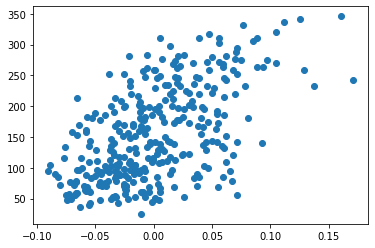

In [24]:
print(X_train.shape)

_, axe = plt.subplots()
axe.scatter(X_train, y_train)

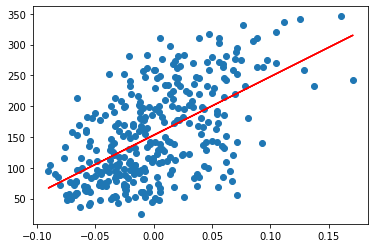

In [27]:
m  = LinearRegression().fit(X_train, y_train)

_, axe = plt.subplots()
axe.scatter(X_train, y_train)
axe.plot(X_train, m.predict(X_train), c = 'r')

11/11 [==============================] - 0s 2ms/step


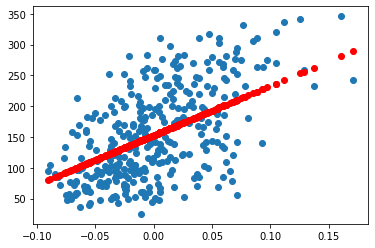

In [33]:
model =keras.Sequential([
    keras.layers.InputLayer(input_shape = [1,]),
    keras.layers.Dense(units = 1)
])

#model.summary()
#model.weights
#model.predict(X_train)


#model.compile(optimizer='adam', loss='mse')
#model.compile(optimizer='SGD', loss='mse')==> 일자로 쭉 그어진다. ==> 머신러닝이 되지 않은 것이다.
model.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.1), loss = 'mse')
              #optimizer 기본값으로 돌리고 싶으면 문자열로 내가 원하는 값을 줄려면 learning_rate = 0.1처럼 매개변수를 줘야한다.
              #learning_rate는 기울기가 내려오는 속도를 정해주는 것이다.
              #loss는 목표값이다. 이것 역시 optimizer처럼 tf.loss해서 설정해줄 수 있다.
model.fit(X_train, y_train, epochs = 1000, verbose = 0) #verbose = 0 는 epochs돌아가는 출력물을 안내게 해주는 것


_, axe = plt.subplots()
axe.scatter(X_train, y_train)
axe.scatter(X_train, model.predict(X_train), c = 'r')

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 64)                128       
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,241
Trainable params: 2,241
Non-trainable params: 0
_________________________________________________________________
11/11 [==============================] - 0s 2ms/step


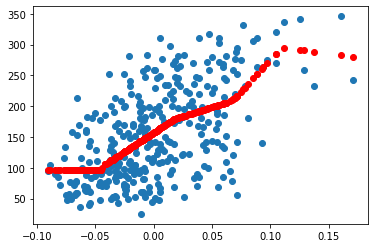

In [38]:
# DNN => LinearRegression이라고 볼 수 있다.
model2 =keras.Sequential([
    keras.layers.InputLayer(input_shape = [1,]),
    keras.layers.Dense(units = 64, activation='relu'), #activation = 'relu'를 사용한다.
    keras.layers.Dense(units = 32, activation='relu'),
    keras.layers.Dense(units = 1)
])

model2.summary()
model2.weights
model2.predict(X_train)


#model.compile(optimizer='adam', loss='mse')
model2.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.1), loss = 'mse')
#model.fit 이 매소드는 return값 이 존재한다.              
history = model2.fit(X_train, y_train, epochs = 1000, verbose = 0) 


_, axe = plt.subplots()
axe.scatter(X_train, y_train)
axe.scatter(X_train, model2.predict(X_train), c = 'r')

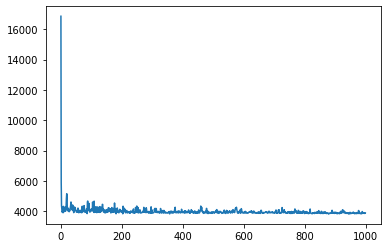

In [39]:
_, axe = plt.subplots()
axe.plot(history.history['loss'])
#history.history['loss'] => loss값을 기록하는 것이다.


#callback.api가 있는데 그것은 1번의 epochs가 1번 돌때마다 바로바로 저장하도록하는 기능을 할 수 있다.
#callback.api로 loss값을 어느정도 정해서 그 값이 만족되면 더 이상 epochs를 더 이상 돌지 말라고 한다.